# DATA EXLORATION

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
data=pd.read_csv('BindingDB_All.tsv',sep='\t', on_bad_lines='skip')

/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_1818/3904283476.py:2: DtypeWarning: Columns (8,9,10,11,12,13,15,17,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,146,147,148,149,150,151,158,159,160,161,162,163,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('BindingDB_All.tsv',sep='\t', on_bad_lines='skip')


## AFFINITY MEASURE

In [ ]:
affinity = data.iloc[:, 8:16]

NameError: name 'data' is not defined

In [71]:
# To save when it's clean 
clean_affinity = affinity.copy()

In [8]:
# Save the affinity measures, to not have to load the all dataset each time 
affinity.to_csv('affinity_measure.csv')

In [ ]:
# No complete data
affinity.dropna()

,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp (C)


## Individual column

### Ki

- inhibition constant, concentration of an inhibitor needed to decrease the enzyme's activity to half of its maximum rate when substrate concentration is high.
- measures the binding affinity between the enzyme and the inhibitor (lower Ki values indicate stronger inhibition)
- Used in Michaelis-Menten kinetics to understand competitive, non-competitive, and uncompetitive inhibition.

    - Competitive Inhibition: The inhibitor competes with the substrate for binding to the enzyme's active site. Here, Ki reflects how well the inhibitor can block substrate binding.

    - Non-Competitive Inhibition: The inhibitor binds to a different site, not the active site, changing the enzyme's activity without blocking substrate binding. In this case, Ki indicates the efficacy of the inhibitor at reducing the reaction rate.

In [13]:
# Percent of not nan value 
per = 100*affinity['Ki (nM)'].dropna().shape[0]/affinity['Ki (nM)'].shape[0]
print(per)

# Number 
nb = affinity['Ki (nM)'].dropna().shape[0]
print(nb)

20.31911679894543
591904


In [14]:
ki = affinity['Ki (nM)']
# Type of the data 
ki.unique()

array([' 0.24', ' 0.25', ' 0.41', ..., '244.0', '346.0', '5100.0'],
      dtype=object)

In [15]:
# we have string and float, and among the string we have some of them that have blank space, lets uniformize 
# Remove any character that is not number + the blank space but keep if we have >< signe
ki = ki.str.replace(r'[^0-9.\-<>]', '', regex=True).str.strip()

# Convert to numerics 
ki_uniform = pd.to_numeric(ki, errors= 'coerce') # the <> will be set as nan - see latter if we want to use them 

In [16]:
# save into clean affinity
clean_affinity['Ki (nM)'] = ki_uniform

In [17]:
# Final size of usable data (percent of the original dataset)
100*ki_uniform.dropna().shape[0]/ki.shape[0]

17.727391316288138

Ki (nM)
12.000      3441
10.000      3422
2.000       3407
0.550       3243
11.000      3187
            ... 
1.923          1
1.735          1
1.855          1
2.285          1
9128.000       1
Name: count, Length: 21713, dtype: int64


Text(0.5, 1.0, 'Ki count value distribution')

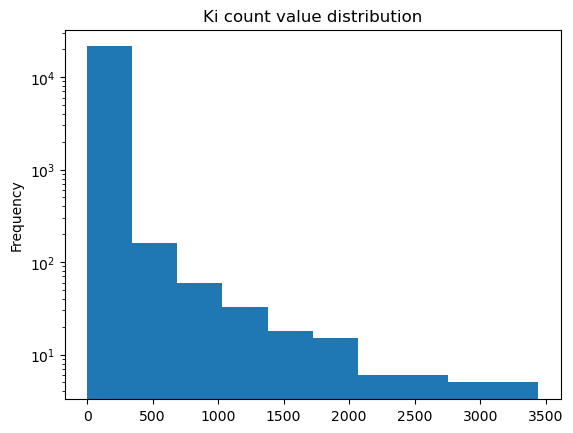

In [18]:
# We have lot of small value and very small of large range of values without na
value_count = ki_uniform.dropna().value_counts()
print(value_count)

value_count.plot(kind='hist', logy=True)
plt.title('Ki count value distribution')

<Axes: ylabel='Frequency'>

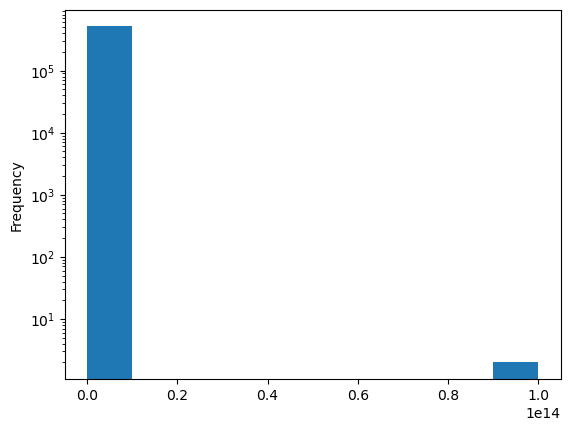

In [19]:
ki_uniform.dropna().plot(kind='hist', logy =True)

<Axes: ylabel='Frequency'>

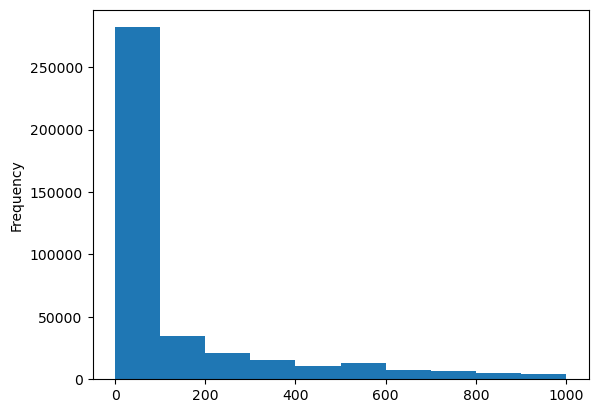

In [20]:
ki_small = ki_uniform[ki_uniform< 1000]
ki_small.dropna().plot(kind = 'hist')

In [21]:
# very very large 
ki_large = ki_uniform[ki_uniform > 100000000]
ki_large


49460      2.000000e+08
176846     2.100000e+08
176847     4.400000e+08
198926     1.010000e+08
198927     1.740000e+08
               ...     
2691211    7.413102e+08
2691227    2.884032e+08
2691234    9.908319e+08
2741794    1.370000e+08
2771541    1.000000e+09
Name: Ki (nM), Length: 303, dtype: float64

In [22]:
# it's right in the original file 
affinity['Ki (nM)'][2536139]

' 99999999999999'

### IC50
- half maximal inhibitory concentration,  effectiveness of a substance in inhibiting. 
- concentration of a substance (such as a drug or inhibitor) that is required to inhibit 50% of a target's activity in a particular assay.
- quantitative measure of how effective an inhibitor is.

Relationship with Ki : While IC₅₀ is often used in practical applications to assess inhibitor strength, it is not the same as Ki. The IC₅₀ value depends on both the concentration of the inhibitor and the conditions of the assay, such as the concentration of substrate, whereas Ki is more specific to the interaction between the enzyme and the inhibitor. For a competitive inhibitor, the IC₅₀ can be converted to Ki using the Cheng-Prusoff equation if you know the substrate concentration and Km (Michaelis constant).

In [23]:
# Percent of not nan value 
per = 100*affinity['IC50 (nM)'].dropna().shape[0]/affinity['IC50 (nM)'].shape[0]
print(per)

# Number 
nb = affinity['IC50 (nM)'].dropna().shape[0]
print(nb)

66.78421854832065
1945451


IC50 glimps of the dataset values
[nan '>50000' ' 6676.9' ... ' 30750' ' 856450' ' 895090000']


Text(0.5, 1.0, 'ICA50 distribution value counts, (log scale)')

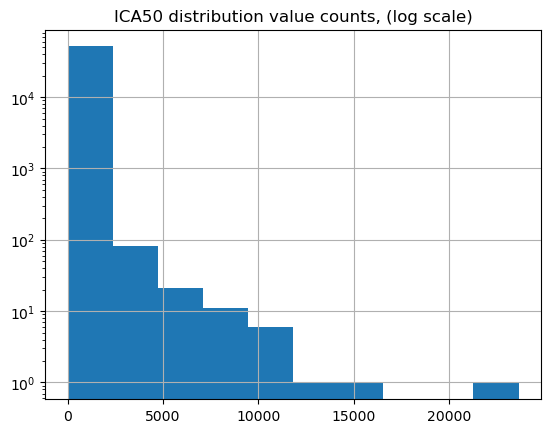

In [24]:
IC50 = affinity['IC50 (nM)']
# Type of the data 
print('IC50 glimps of the dataset values')
print(IC50.unique())

# replace blank
IC50 = IC50.str.replace(r'[^0-9.\-<>]', '', regex=True).str.strip()

# Convert to numerics 
IC50_uniform = pd.to_numeric(IC50, errors= 'coerce') # the <> will be set as nan - see latter if we want to use them 

# save into clean affinity
clean_affinity['IC50 (nM)'] = IC50_uniform

# histo of the count
value_count = IC50_uniform.dropna().value_counts()
value_count.hist(log=True)
plt.title('ICA50 distribution value counts, (log scale)')

<Axes: ylabel='Frequency'>

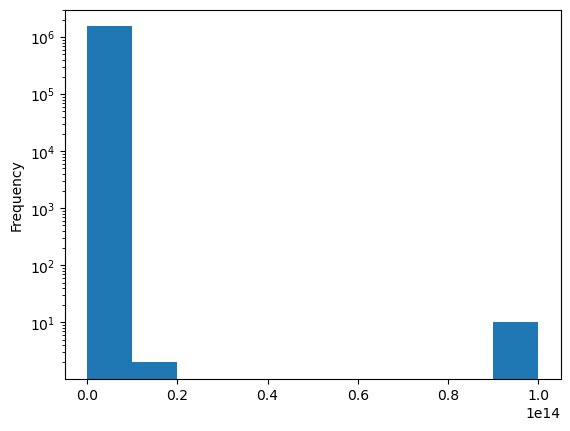

In [25]:
# very large and very small 
IC50_uniform.dropna().plot(kind='hist', logy=True)

<Axes: ylabel='Frequency'>

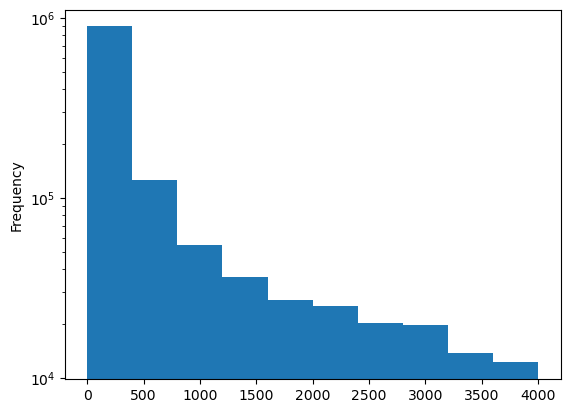

In [26]:
IC50_small = IC50_uniform[IC50_uniform< 4000]
IC50_small.dropna().plot(kind = 'hist', logy=True)

In [27]:
# Final size of usable data (percent of the original dataset)
100*IC50_uniform.dropna().shape[0]/IC50.shape[0]

53.002567764260014

### Kd

In [28]:
# Percent of not nan value 
per = 100*affinity['Kd (nM)'].dropna().shape[0]/affinity['Kd (nM)'].shape[0]
print(per)

# Number 
nb = affinity['Kd (nM)'].dropna().shape[0]
print(nb)

3.8044105127289702
110824


Kd glimps of the dataset values
[nan '43000.0' '77000.0' ... ' 59900' ' 109900' ' 148200']


Text(0.5, 1.0, 'Kd distribution value count (logscale)')

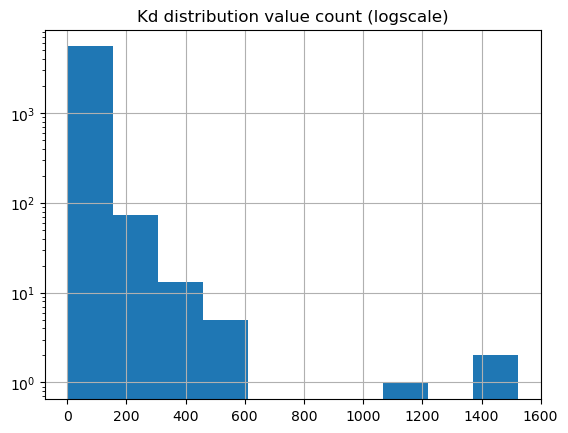

In [29]:
kd = affinity['Kd (nM)']
# Type of the data 
print('Kd glimps of the dataset values')
print(kd.unique())

# replace blank
kd = kd.str.replace(r'[^0-9.\-<>]', '', regex=True).str.strip()

# Convert to numerics 
kd_uniform = pd.to_numeric(kd, errors= 'coerce') # the <> will be set as nan - see latter if we want to use them 

# save into clean affinity
clean_affinity['Kd (nM)'] = kd_uniform

# Final size of usable data (percent of the original dataset)
100*kd_uniform.dropna().shape[0]/kd.shape[0]

# histo of the count
value_count = kd_uniform.dropna().value_counts()
value_count.hist(log=True)
plt.title('Kd distribution value count (logscale)')

<Axes: ylabel='Frequency'>

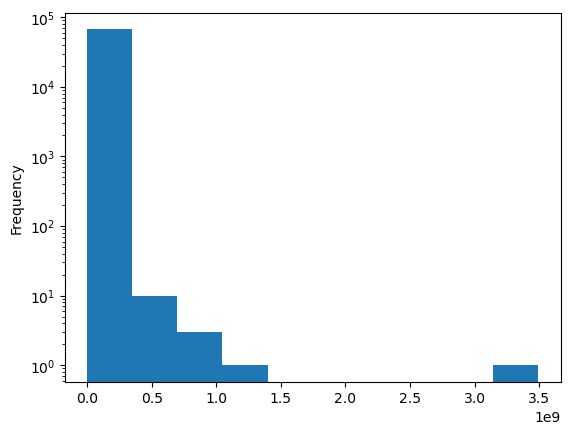

In [30]:
kd_uniform.dropna().plot(kind = 'hist', logy = True)

<Axes: ylabel='Frequency'>

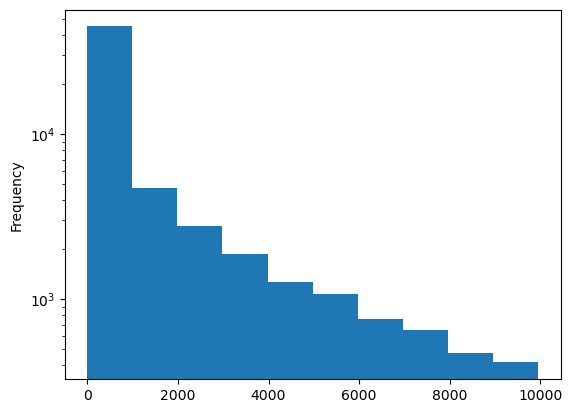

In [31]:
kd_small = kd_uniform[kd_uniform< 10000]
kd_small.dropna().plot(kind = 'hist', logy=True)

In [32]:
# Final size of usable data (percent of the original dataset)
100*kd_uniform.dropna().shape[0]/kd.shape[0]

2.298526625106418

### EC50

In [33]:
# Percent of not nan value 
per = 100*affinity['EC50 (nM)'].dropna().shape[0]/affinity['EC50 (nM)'].shape[0]
print(per)

# Number 
nb = affinity['EC50 (nM)'].dropna().shape[0]
print(nb)

9.19252739406256
267782


EC50 glimps of the dataset values
[nan '70.0' '80.0' ... ' 50000000' ' 15190000' '<2.5']


Text(0.5, 1.0, 'EC50 (nM) distribution value count (logscale)')

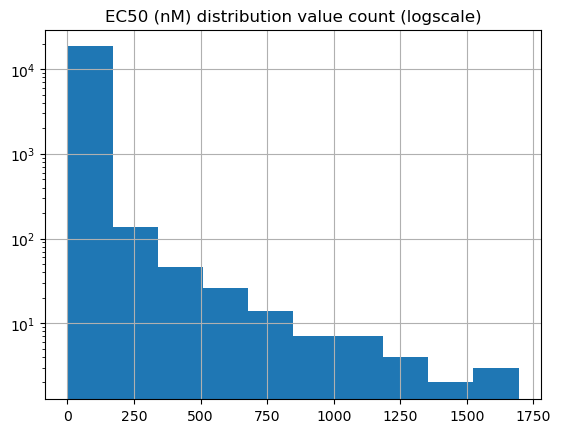

In [34]:
EC50 = affinity['EC50 (nM)']
# Type of the data 
print('EC50 glimps of the dataset values')
print(EC50.unique())

# replace blank
EC50 = EC50.str.replace(r'[^0-9.\-<>]', '', regex=True).str.strip()

# Convert to numerics 
EC50_uniform = pd.to_numeric(EC50, errors= 'coerce') # the <> will be set as nan - see latter if we want to use them 

# save into clean affinity
clean_affinity['EC50 (nM)'] = EC50_uniform

# Final size of usable data (percent of the original dataset)
100*EC50_uniform.dropna().shape[0]/EC50.shape[0]

# histo of the count
value_count = EC50_uniform.dropna().value_counts()
value_count.hist(log=True)
plt.title('EC50 (nM) distribution value count (logscale)')

<Axes: ylabel='Frequency'>

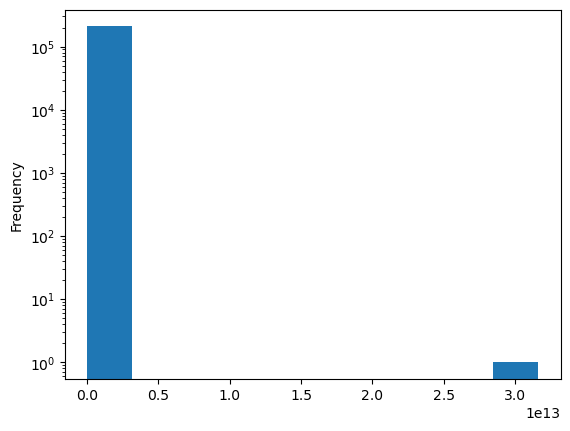

In [35]:
EC50_uniform.dropna().plot(kind='hist', logy=True)

<Axes: ylabel='Frequency'>

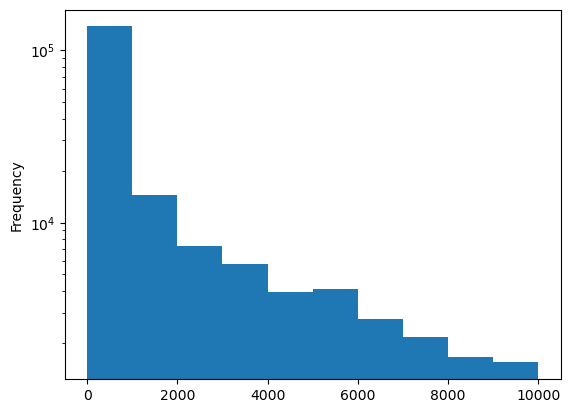

In [36]:
EC50_small = EC50_uniform[EC50_uniform< 10000]
EC50_small.dropna().plot(kind = 'hist', logy=True)

In [37]:
# Final size of usable data (percent of the original dataset)
100*EC50_uniform.dropna().shape[0]/EC50.shape[0]

7.1804026034657955

### kon

In [38]:
# Percent of not nan value 
per = 100*affinity['kon (M-1-s-1)'].dropna().shape[0]/affinity['kon (M-1-s-1)'].shape[0]
print(per)

# Number 
nb = affinity['kon (M-1-s-1)'].dropna().shape[0]
print(nb)

0.034534369593277124
1006


kon (M-1-s-1)
1400000.0    12
1800000.0    11
3000000.0    10
1100000.0     8
1300000.0     8
             ..
670000.0      1
8500000.0     1
2260000.0     1
4680000.0     1
160000.0      1
Name: count, Length: 191, dtype: int64


Text(0.5, 1.0, 'kon (M-1-s-1) distribution')

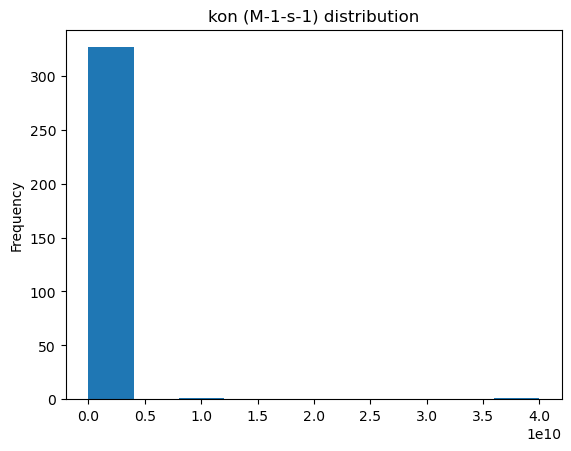

In [39]:
kon = affinity['kon (M-1-s-1)']
# Type of the data 
#print('kon glimps of the dataset values')
#print(kon.unique())

# replace blank
kon = kon.str.replace(r'[^0-9.\-<>]', '', regex=True).str.strip()

# Convert to numerics 
kon_uniform = pd.to_numeric(kon, errors= 'coerce') # the <> will be set as nan - see latter if we want to use them 

# save into clean affinity
clean_affinity['kon (M-1-s-1)'] = kon_uniform

# Final size of usable data (percent of the original dataset)
100*kon_uniform.dropna().shape[0]/kon.shape[0]

# histo of the count
value_count = kon_uniform.dropna().value_counts()
print(value_count)
kon_uniform.dropna().plot(kind="hist")
plt.title('kon (M-1-s-1) distribution')


<Axes: ylabel='Frequency'>

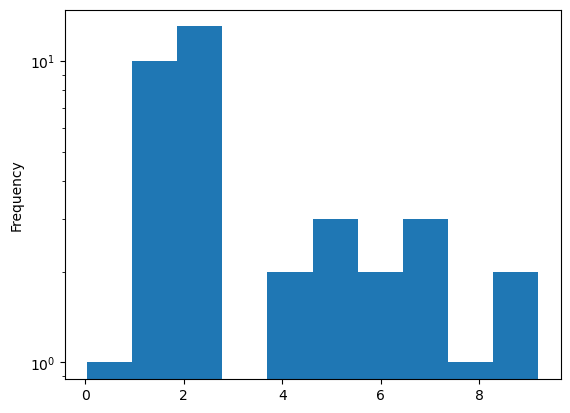

In [40]:
kon_small = kon_uniform[kon_uniform< 60]
kon_small.dropna().plot(kind = 'hist', logy=True)

In [41]:
# Final size of usable data (percent of the original dataset)
100*kon_uniform.dropna().shape[0]/kon.shape[0]

0.011294043336171148

### koff

In [42]:
# Percent of not nan value 
per = 100*affinity['koff (s-1)'].dropna().shape[0]/affinity['koff (s-1)'].shape[0]
print(per)

# Number 
nb = affinity['koff (s-1)'].dropna().shape[0]
print(nb)

0.03384780160931535
986


Text(0.5, 1.0, 'koff (s-1) distribution value count (logscale)')

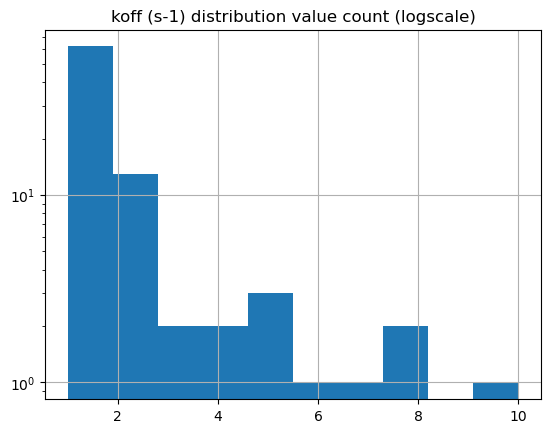

In [43]:
koff = affinity['koff (s-1)']
# Type of the data 
#print('kon glimps of the dataset values')
#print(koff.unique())

# replace blank
koff = koff.str.replace(r'[^0-9.\-<>]', '', regex=True).str.strip()

# Convert to numerics 
koff_uniform = pd.to_numeric(koff, errors= 'coerce') # the <> will be set as nan - see latter if we want to use them 

# save into clean affinity
clean_affinity['koff (s-1)'] = koff_uniform

# Final size of usable data (percent of the original dataset)
100*koff_uniform.dropna().shape[0]/koff.shape[0]

# histo of the count
value_count = koff_uniform.dropna().value_counts()
value_count.hist(log=True)
plt.title('koff (s-1) distribution value count (logscale)')


<Axes: ylabel='Frequency'>

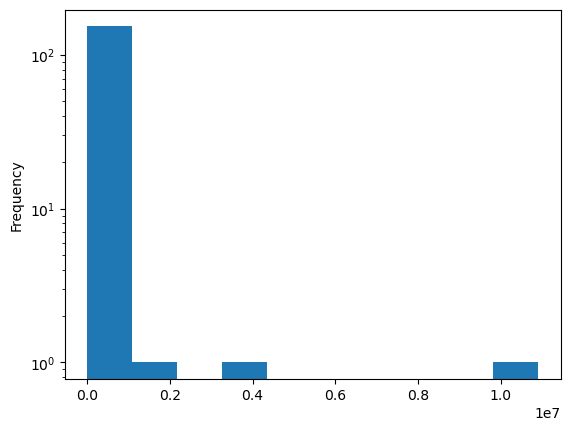

In [44]:
koff_uniform.dropna().plot(kind = 'hist', logy=True)

<Axes: ylabel='Frequency'>

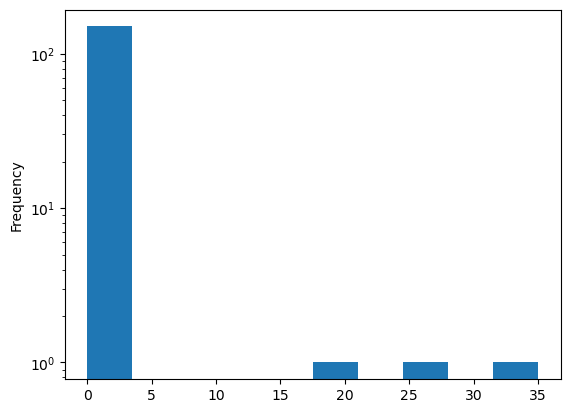

In [45]:
koff_small = koff_uniform[koff_uniform< 70]
koff_small.dropna().plot(kind= 'hist', log=True)

In [46]:
# Final size of usable data (percent of the original dataset)
100*koff_uniform.dropna().shape[0]/koff.shape[0]

0.005355230274901821

### pH and Temp

In [47]:
pH= affinity['pH']
# Percent of not nan value 
per = 100*pH.dropna().shape[0]/pH.shape[0]
print(per)

# Number 
nb = pH.dropna().shape[0]
print(nb)

7.389565539779749
215261


In [48]:
pH.unique()


array([ 5.5 ,  4.7 ,   nan,  6.  ,  7.4 ,  7.5 ,  5.2 ,  5.  ,  6.2 ,
        6.4 ,  6.5 ,  6.25,  8.2 ,  7.7 ,  7.8 ,  7.2 ,  7.3 ,  8.  ,
        8.3 ,  7.9 ,  8.5 ,  7.  ,  5.6 ,  7.6 ,  8.4 ,  4.5 ,  6.8 ,
        6.3 ,  6.1 ,  7.72,  8.04,  7.45,  7.02,  6.7 ,  8.06,  7.67,
        7.39,  4.8 ,  4.6 ,  8.1 ,  6.6 ,  4.  ,  2.  ,  7.1 ,  5.9 ,
        9.  ,  6.9 ,  9.5 ,  8.6 ,  3.1 ,  5.8 ,  4.25,  3.7 ,  7.35,
        5.52,  3.5 ,  5.75,  6.85, 10.  ,  9.2 ,  3.  , 10.5 ,  8.05,
       10.6 ,  2.2 ,  8.8 ,  9.6 ,  5.01,  4.2 ,  4.4 ,  2.5 ,  7.43,
        9.8 ,  5.4 ,  7.25,  7.15,  5.1 ,  7.55,  6.55,  3.2 ,  3.3 ,
        1.9 ,  8.25,  5.3 ,  4.9 , 10.4 ,  8.7 ,  7.37])

Text(0.5, 1.0, 'pH distribution in logscale')

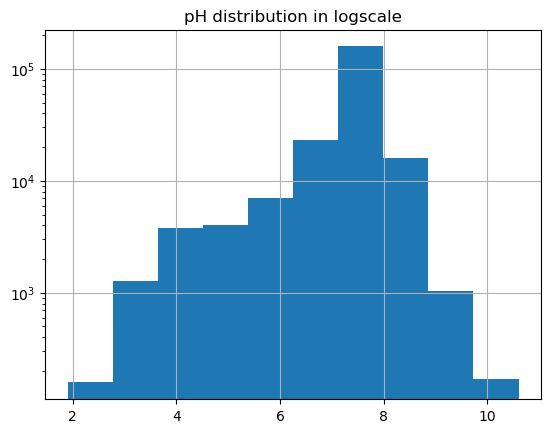

In [49]:
pH.dropna().hist(log=True)
plt.title('pH distribution in logscale')

In [50]:
Temp = affinity['Temp (C)']

# Percent of not nan value 
per = 100*Temp.dropna().shape[0]/Temp.shape[0]
print(per)

# Number 
nb = Temp.dropna().shape[0]
print(nb)

6.896747040891989
200905


In [51]:
Temp.unique()

array(['37.00 C', '25.00 C', nan, '30.00 C', '22.00 C', '4.00 C',
       '28.00 C', '23.00 C', '20.00 C', '21.00 C', '35.00 C', '38.00 C',
       '27.00 C', '24.00 C', '40.00 C', '32.00 C', '0.00 C', '55.00 C',
       '26.00 C', '36.00 C', '22.50 C', '15.00 C', '34.00 C', '10.00 C',
       '16.00 C', '7.70 C', '2.70 C', '3.60 C', '3.50 C', '-70.00 C',
       '5.00 C', '18.00 C', '25.50 C', '7.50 C', '80.00 C', '-80.00 C',
       '50.00 C', '310.15 C', '293.15 C', '1663.90 C', '1390.75 C',
       '1117.60 C', '844.45 C', '571.30 C', '298.15 C', '834.45 C',
       '303.15 C', '60.00 C', '42.00 C', '14.00 C', '-248.15 C', '2.00 C',
       '11.00 C', '1.00 C', '31.00 C', '43.00 C', '65.00 C', '48.00 C',
       '70.00 C'], dtype=object)

In [52]:
Temp = Temp.str.replace(r'[^0-9.]', '', regex=True).str.strip()
Temp = pd.to_numeric(Temp, errors= 'coerce')

# save into clean affinity
clean_affinity['Temp (C)'] = Temp


<Axes: >

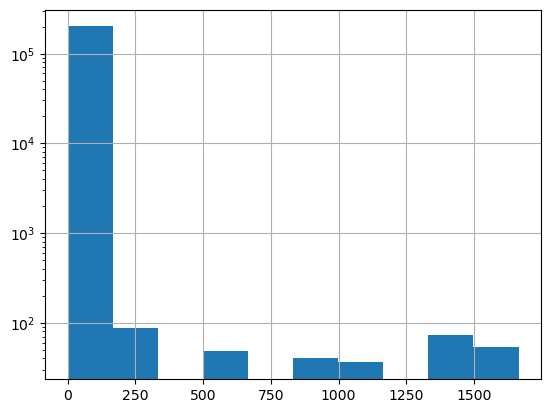

In [53]:
Temp.dropna().hist(log=True)

## Shared information
Check if some index have more than 1 affinity measure / temp or pH

In [76]:
commun_pairs= pd.DataFrame(index = affinity.columns, columns=affinity.columns)

In [77]:
commun_pairs

,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp (C)
Ki (nM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IC50 (nM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kd (nM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EC50 (nM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kon (M-1-s-1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koff (s-1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Pairs data 
from itertools import combinations

for i, j in combinations(clean_affinity.columns, 2) : 
    commun_pairs.at[i, j]= clean_affinity[[i, j]].dropna().shape[0]

commun_pairs

,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp (C)
Ki (nM),NaN,3177,70,970,256,171,38284,33162
IC50 (nM),NaN,NaN,218,1532,0,0,167821,152783
Kd (nM),NaN,NaN,NaN,11,76,51,4031,2430
EC50 (nM),NaN,NaN,NaN,NaN,0,0,7765,15157
kon (M-1-s-1),NaN,NaN,NaN,NaN,NaN,246,60,31
koff (s-1),NaN,NaN,NaN,NaN,NaN,NaN,72,45
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129990
Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# trio data 
trio = pd.DataFrame()

for i, j, k in combinations(clean_affinity.columns, 3) : 
    nb = clean_affinity[[i, j, k]].dropna().shape[0]
    
    if nb != 0 : 
        df = pd.DataFrame([[i, j, k, nb]])
        
        trio = pd.concat([trio, df])
        
trio.columns = [1, 2, 3, 'number']

In [58]:
trio[trio['number'] > 10000]

,1,2,3,number
0,Unnamed: 0,Ki (nM),pH,35680
0,Unnamed: 0,Ki (nM),Temp (C),30922
0,Unnamed: 0,IC50 (nM),pH,142522
0,Unnamed: 0,IC50 (nM),Temp (C),129535
0,Unnamed: 0,EC50 (nM),Temp (C),12262
0,Unnamed: 0,pH,Temp (C),129990
0,Ki (nM),pH,Temp (C),22243
0,IC50 (nM),pH,Temp (C),84655


In [59]:
# look if Ki and ICA50 have commun 
commun_pairs.at['Ki (nM)', 'IC50 (nM)']

3009

In [60]:
# with temp and pH
clean_affinity[['Ki (nM)', 'IC50 (nM)', 'Temp (C)', 'pH']].dropna().shape[0]

1015

In [61]:
# with temp only 
clean_affinity[['Ki (nM)', 'IC50 (nM)', 'Temp (C)']].dropna().shape[0]

1496

In [62]:
# with pH only 
clean_affinity[['Ki (nM)', 'IC50 (nM)', 'pH']].dropna().shape[0]

1546